In [1]:
# Import libraries (delete ones we don't use later)
import csv
import json
import requests
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from alpha_api_key import api_key
from scipy.stats import linregress
from datetime import datetime

def lin_reg(x, y, annotate):
    (slope,intercept,rvalue,pvalue,stderror) = linregress(x,y)
    reg_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    plt.plot(x, reg_values, color='r')
    plt.annotate(line_eq, annotate, fontsize=15, color='r')

In [2]:
# Create our stock csv files by pulling from Alpha Advantage API
ticker = ["ABBV", "BMY", "CTLT", "LLY", "JNJ", "MRK", "OGN", "PFE", "VTRS", "ZTS" ]

for i in ticker:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=" + i + \
    "&apikey=" + api_key + "&datatype=csv"
    
    print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=ABBV&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BMY&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=CTLT&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=LLY&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=JNJ&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MRK&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=OGN&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=PFE&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=VTRS&apikey=5IF8HCWU4YG2VDFI&datatype=cs

In [3]:
# Import csv files and merge into one data frame
abbv_stock = "csv_files/monthly_ABBV.csv"
bmy_stock = "csv_files/monthly_BMY.csv"
ctlt_stock = "csv_files/monthly_CTLT.csv"
lly_stock = "csv_files/monthly_LLY.csv"
jnj_stock = "csv_files/monthly_JNJ.csv"
mrk_stock = "csv_files/monthly_MRK.csv"
ogn_stock = "csv_files/monthly_OGN.csv"
pfe_stock = "csv_files/monthly_PFE.csv"
vtrs_stock = "csv_files/monthly_VTRS.csv"
zts_stock = "csv_files/monthly_ZTS.csv"

abbv_df = pd.read_csv(abbv_stock).sort_values(by=['timestamp']).reset_index(drop=True)
bmy_df = pd.read_csv(bmy_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ctlt_df = pd.read_csv(ctlt_stock).sort_values(by=['timestamp']).reset_index(drop=True)
lly_df = pd.read_csv(lly_stock).sort_values(by=['timestamp']).reset_index(drop=True)
jnj_df = pd.read_csv(jnj_stock).sort_values(by=['timestamp']).reset_index(drop=True)
mrk_df = pd.read_csv(mrk_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ogn_df = pd.read_csv(ogn_stock).sort_values(by=['timestamp']).reset_index(drop=True)
pfe_df = pd.read_csv(pfe_stock).sort_values(by=['timestamp']).reset_index(drop=True)
vtrs_df = pd.read_csv(vtrs_stock).sort_values(by=['timestamp']).reset_index(drop=True)
zts_df = pd.read_csv(zts_stock).sort_values(by=['timestamp']).reset_index(drop=True)

merge_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
            abbv_df, bmy_df, how='outer'), ctlt_df, how='outer'), lly_df, how='outer'), \
            jnj_df, how='outer'), mrk_df, how='outer'), ogn_df, how='outer'), \
            pfe_df, how='outer'), vtrs_df, how='outer'), zts_df, how='outer')

# Format timestamp column so they are all the same
merge_df['timestamp'] = pd.to_datetime(merge_df['timestamp'], format='mixed')

# Save merged data frame to new csv
merge_df.to_csv('csv_files/merge_stock.csv', index=False)

graph_df = merge_df.copy()

graph_df['timestamp'] = graph_df['timestamp'].apply(mdates.date2num)
graph_df['timestamp'] = graph_df['timestamp'].astype(float)

In [4]:
merge_df.sort_values(by = 'timestamp', inplace = True)


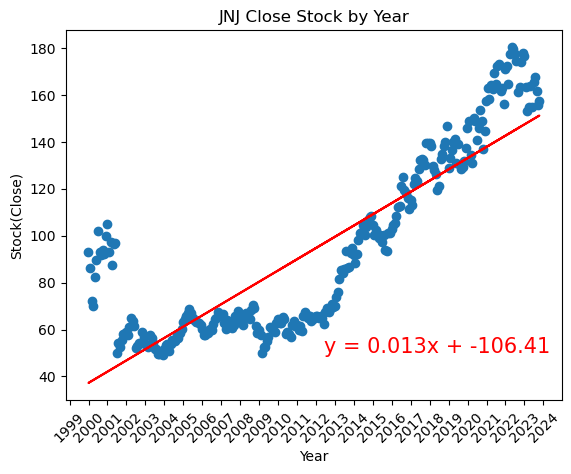

In [5]:
jnj_df_merged = graph_df.loc[graph_df['ticker'] == 'JNJ']

x = jnj_df_merged['timestamp']
y = jnj_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('JNJ Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 50)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/JNJ_graph.png")

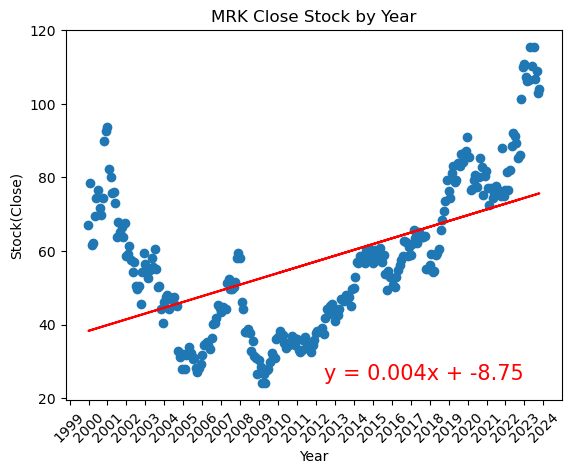

In [6]:
mrk_df_merged = graph_df.loc[graph_df['ticker'] == 'MRK']

x = mrk_df_merged['timestamp']
y = mrk_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('MRK Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 25)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/MRK_graph.png")

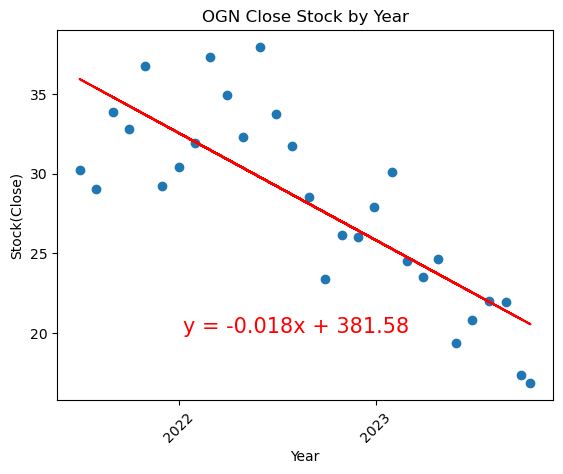

In [7]:
ogn_df_merged = graph_df.loc[graph_df['ticker'] == 'OGN']

x = ogn_df_merged['timestamp']
y = ogn_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('OGN Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (19000, 20)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/OGN_graph.png")

ABBV: Difference in 'close' values - 110.31
BMY: Difference in 'close' values - -7.02
CTLT: Difference in 'close' values - 25.02
JNJ: Difference in 'close' values - 64.28
LLY: Difference in 'close' values - 550.14
MRK: Difference in 'close' values - 36.95
OGN: Difference in 'close' values - -13.40
PFE: Difference in 'close' values - 0.83
VTRS: Difference in 'close' values - -9.27
ZTS: Difference in 'close' values - 141.78


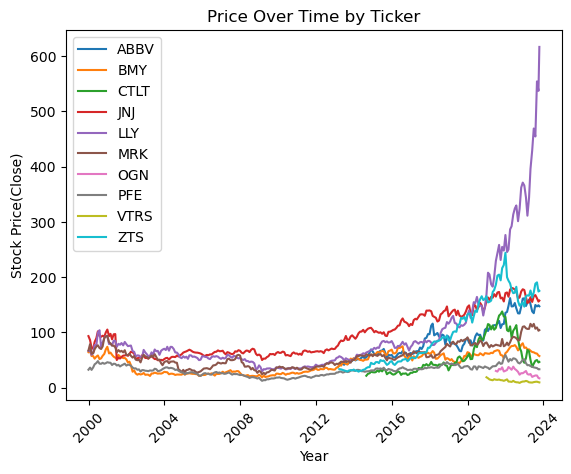

In [8]:
differences = {}

for ticker, group in merge_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)
    start_close = group['close'].iloc[0]
    end_close = group['close'].iloc[-1] 
    difference = end_close - start_close

    differences[ticker] = difference

plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraphalltime.png")

for ticker, difference in differences.items():
    print(f"{ticker}: Difference in 'close' values - {difference:.2f}")

plt.savefig("graphs/linegraphalltime.png")

ABBV: Difference in 'close' values - 35.01
BMY: Difference in 'close' values - -5.43
CTLT: Difference in 'close' values - -0.02
JNJ: Difference in 'close' values - 19.34
LLY: Difference in 'close' values - 535.19
MRK: Difference in 'close' values - 44.89
OGN: Difference in 'close' values - -13.40
PFE: Difference in 'close' values - -3.77
VTRS: Difference in 'close' values - -9.27
ZTS: Difference in 'close' values - 98.45


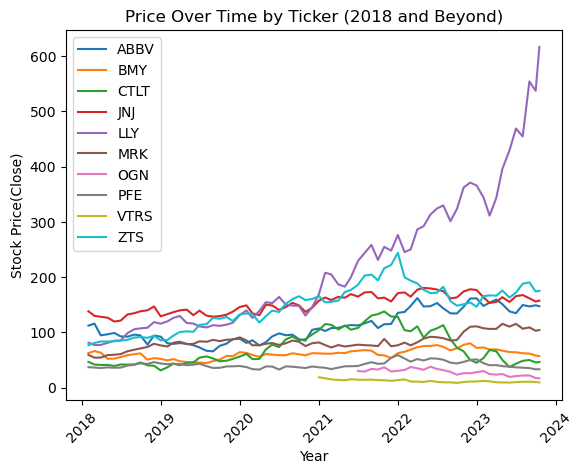

In [9]:
recent_df = merge_df[merge_df['timestamp'].dt.year >= 2018]

differences = {}

for ticker, group in recent_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)
    start_close = group['close'].iloc[0]
    end_close = group['close'].iloc[-1] 
    difference = end_close - start_close

    differences[ticker] = difference
    
plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker (2018 and Beyond)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraph2018andbeyond.png")

for ticker, difference in differences.items():
    print(f"{ticker}: Difference in 'close' values - {difference:.2f}")

plt.savefig("graphs/linegraph2018andbeyond.png")

ABBV: Difference in 'close' values - 59.79
BMY: Difference in 'close' values - -2.91
CTLT: Difference in 'close' values - 19.58
JNJ: Difference in 'close' values - 46.47
LLY: Difference in 'close' values - 17.96
MRK: Difference in 'close' values - -10.92
PFE: Difference in 'close' values - 3.78
ZTS: Difference in 'close' values - 38.64


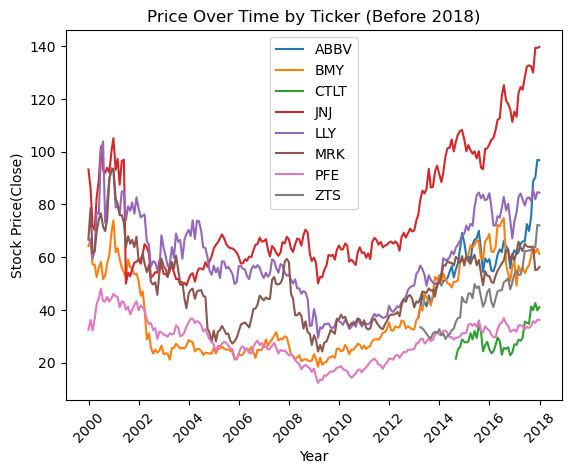

In [10]:
past_df = merge_df[merge_df['timestamp'].dt.year < 2018]

differences = {}

for ticker, group in past_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)
    start_close = group['close'].iloc[0]
    end_close = group['close'].iloc[-1] 
    difference = end_close - start_close

    differences[ticker] = difference


plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker (Before 2018)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraphbefore2018.png")

for ticker, difference in differences.items():
    print(f"{ticker}: Difference in 'close' values - {difference:.2f}")
    
plt.savefig("graphs/linegraphbefore2018.png")

In [11]:
graph_df

,ticker,timestamp,open,high,low,close,volume
0,ABBV,15764.0,36.84,39.13,35.0100,36.92,151690500
1,ABBV,15792.0,36.80,40.80,36.5510,40.78,122236200
2,ABBV,15825.0,39.96,46.32,39.9600,46.05,176083000
3,ABBV,15856.0,45.74,48.00,42.6825,42.69,119566400
4,ABBV,15884.0,42.88,44.47,40.1000,41.34,107872600
...,...,...,...,...,...,...,...
1862,ZTS,17074.0,51.15,52.17,50.0700,52.01,74984818
1863,ZTS,18169.0,126.13,130.08,119.5200,124.59,42499438
1864,ZTS,18535.0,160.71,166.79,152.5028,165.37,32363345
1865,ZTS,18900.0,204.56,210.10,191.3300,194.14,31838084


In [12]:



# Define the date
date_string = "Oct 25 2043"
date = datetime.strptime(date_string, '%b %d %Y')

# Convert the date to a numerical value
num_value = mdates.date2num(date)

print(num_value)

26960.0


In [13]:
num_value = 26960.0

# Convert the numerical value back to a date
date = mdates.num2date(num_value)

print(date)

2043-10-25 00:00:00+00:00
